# Introduction

   Hi! My name is Eric, I'm an economist from Brazil. I've always been facinated by the real estate market, and mostly shocked (specially in my country) by the amount of subjectivity in it. I find it very weird that people trust so blindly realters with very little to none economical, math or statistical training. Specially when this person's valuations of real estate is highly biased, since they get a comission from it. 
   
   To me, it's no surprise at all that one of the worst economic crisis of the modern area started in the real estate market. This dataset from Zillow gives us an amazing oportunity to see how were the numbers before 2008 and how are things now. 
   
   The objective of this notebook, it's try to predict wheter we are moving towards a new crash in the real estate market.

  I'm farely new do datascience so any constructive criticism will be greatly appreciated, and if you like this notebook, don't forget to upvote it. If you use any of the code in it, please, don't forget to give credit and link to this notebook!

## 1. Imports 

Let's import and set preferences of a few modules that are going to be necessary for this notebook

In [1]:
# Math and data modules
import numpy as np 
import pandas as pd

# Data visualization modules
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid') # setting the style of the plots

pd.options.display.max_columns = 999 
pd.options.display.max_rows = 999 

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

City_time_series.csv
CountyCrossWalk_Zillow.csv
County_time_series.csv
DataDictionary.csv
Metro_time_series.csv
Neighborhood_time_series.csv
State_time_series.csv
Zip_time_series.csv
all_available_metrics.json
cities_crosswalk.csv
fields_per_level.json



## 2. Handling Data
### Loading data

Since we are doing a more 'macro' analysis, let's use the State dataset rather than cities or counties. I haven't checked the other datasets, but I'm pretty sure that they would all point towards the same directions.

In [2]:
data = pd.read_csv('../input/State_time_series.csv')

In [3]:
data.head()

,Date,RegionName,DaysOnZillow_AllHomes,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,MedianSoldPricePerSqft_AllHomes,MedianSoldPricePerSqft_CondoCoop,MedianSoldPricePerSqft_SingleFamilyResidence,MedianSoldPrice_AllHomes,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PctTransactionsThatArePreviouslyForeclosuredHomes_AllHomes,PriceToRentRatio_AllHomes,Turnover_AllHomes,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.8625,57.0189,54.7162,86725.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61500.0,48900.0,78200.0,146500.0,206300.0,79500.0,NaN,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.9930,64.4452,66.2092,102300.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59200.0,86400.0,96100.0,128300.0,190500.0,103600.0,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0396,NaN,45.9300,68550.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53000.0,54500.0,76800.0,135100.0,186000.0,64400.0,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,Na

### Parsing dates

Since we are going to analyse the market by year, we need to transform our Date column, which is a string now, into a datetime format and then extract the year from it.

Then, we can start grouping data by the new 'Year' feature and ploting it to have an idea of how they behaved during the years.  Let's start by an obvious one, the median of sold price.

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x: x.year)

## 3. Selling Prices

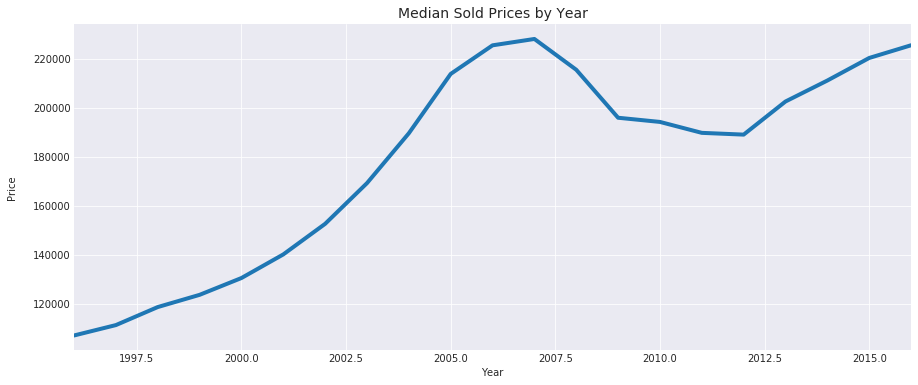

In [5]:
data.groupby(data['Year'])['MedianSoldPrice_AllHomes'].mean().dropna().plot(linewidth=4, figsize=(15, 6))
plt.title('Median Sold Prices by Year', fontsize=14)
plt.ylabel('Price\n')
plt.show()

We can see that before 2005, prices were growing pretty much exponetially and that things started to slowdown around 2006 but still going up, and then, subprime crisis exploded in 2008 and prices started to drop, untill around 2012, when they started to climb back up again. The dataset is missing information from 2017, but we can see that prices have bounced back to pre '08 levels, does it mean that we are on the verge of a new crash in the market? Let's investigate it a little further.

### By states

Highest Median Price $333,660.30 in DistrictofColumbia
Lowest Median Price $87,357.76 in WestVirginia


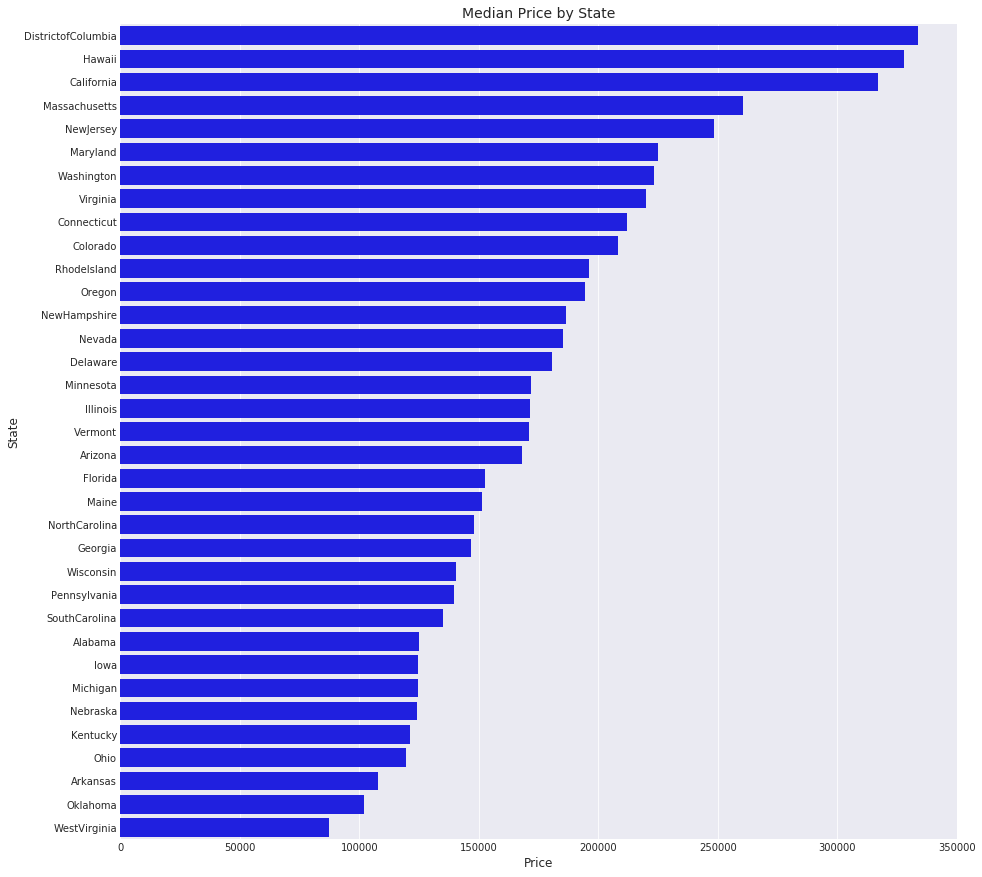

In [6]:
states = data.groupby(data['RegionName'])['MedianSoldPrice_AllHomes'].mean().dropna().sort_values(ascending=False).index
values = data.groupby(data['RegionName'])['MedianSoldPrice_AllHomes'].mean().dropna().sort_values(ascending=False).values
plt.figure(figsize=(15, 15))
sns.barplot(y=states, x=values, color='blue')
plt.title('Median Price by State', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('State', fontsize=12)
print('Highest Median Price ${:,.2f} in {}'.format(round(values[0], 2), states[0]))
print('Lowest Median Price ${:,.2f} in {}'.format(round(values[-1], 2), states[-1]))

## 4. Rent Prices

Usually the rent values are a percentage of the real estate selling price. But it's ratio is influenced by interest rates. I expect it to have the same behaviour as the Selling Price data.

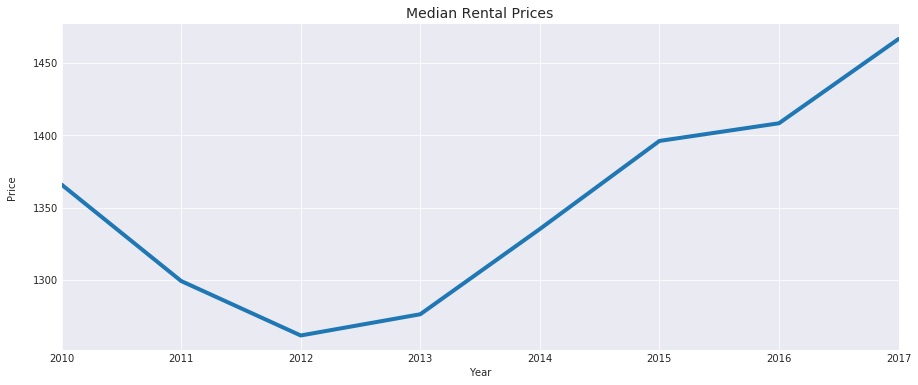

In [7]:
data.groupby(data['Year'])['MedianRentalPrice_AllHomes'].mean().dropna().plot(linewidth=4, figsize=(15, 6))
plt.title('Median Rental Prices', fontsize=14)
plt.ylabel('Price\n')
plt.show()

 Unfortunatelly, in this data set, the rent series only has values after 2010, but we can see that it seems to have the same trends as the selling prices. But the interesting thing here is that, even though prices growth has slowed down in the last years. Rent prices have actually speeded up. I'd say this is probably a result of the FED's monetary policy, increasing interest rates in the past years.

### By state

Highest Median Price $2,941.94 in NewYork
Lowest Median Price $923.29 in Michigan


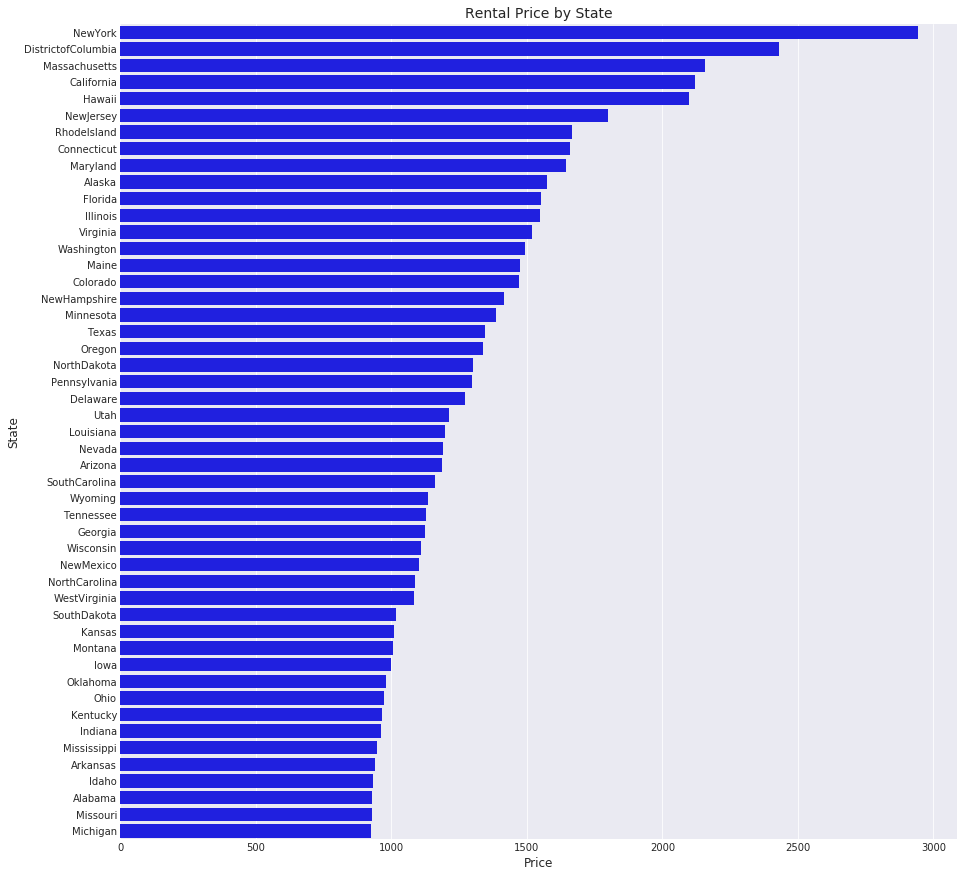

In [8]:
states = data.groupby(data['RegionName'])['MedianRentalPrice_AllHomes'].mean().dropna().sort_values(ascending=False).index
values = data.groupby(data['RegionName'])['MedianRentalPrice_AllHomes'].mean().dropna().sort_values(ascending=False).values
plt.figure(figsize=(15, 15))
sns.barplot(y=states, x=values, color='blue')
plt.title('Rental Price by State', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('State', fontsize=12)
print('Highest Median Price ${:,.2f} in {}'.format(round(values[0], 2), states[0]))
print('Lowest Median Price ${} in {}'.format(round(values[-1], 2), states[-1]))

## 5. How Long to Sell?

One interesting thing we can check is how long it takes to sell a house, and how it changed through out the years. I'd say this is a very good thermometer of how the real estate market is!

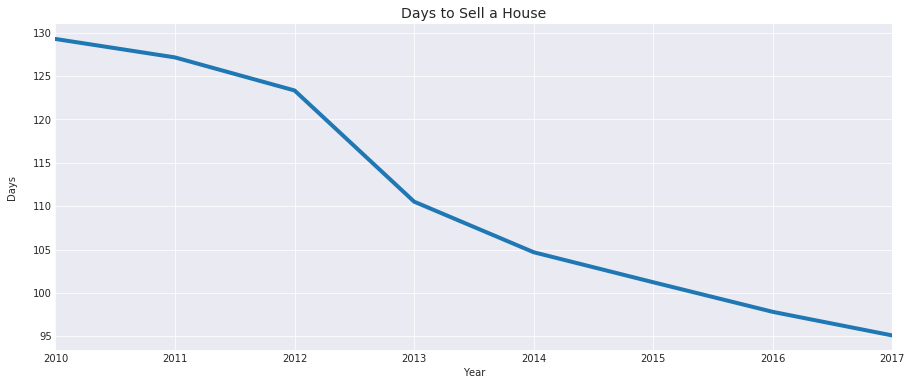

In [9]:
plt.title('Days to Sell a House', fontsize=14)
data.groupby(data['Year'])['DaysOnZillow_AllHomes'].mean().dropna().plot(linewidth=4, figsize=(15, 6))
plt.ylabel('Days\n')
plt.show()

We can see that since this series started in 2010, it's been getting easier and easier to sell a house. The average was around 130 days in 2010 and in 2017 it's around 95 days.

### By State

Hardest to sell in Vermont with 166.7 days
Easiest to sell in California with 79.67 days


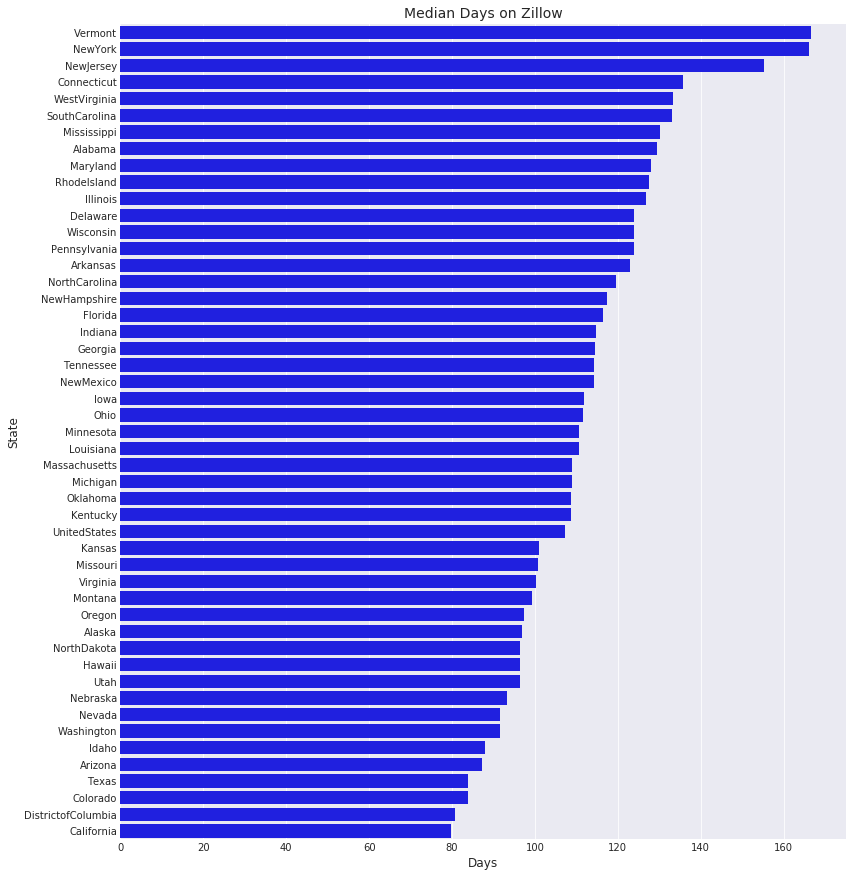

In [10]:
states = data.groupby(data['RegionName'])['DaysOnZillow_AllHomes'].mean().dropna().sort_values(ascending=False).index
values = data.groupby(data['RegionName'])['DaysOnZillow_AllHomes'].mean().dropna().sort_values(ascending=False).values
plt.figure(figsize=(13, 15))
sns.barplot(y=states, x=values, color='blue')
plt.title('Median Days on Zillow', fontsize=14)
plt.xlabel('Days', fontsize=12)
plt.ylabel('State', fontsize=12)
print('Hardest to sell in {} with {} days'.format(states[0], round(values[0], 2)))
print('Easiest to sell in {} with {} days'.format(states[-1], round(values[-1], 2)))

## 7. Foreclosures

I expect that the ratio of houses sold as foreclosure increased around 2008, let's check that.  And to have relatively inverse tendencies to the price.

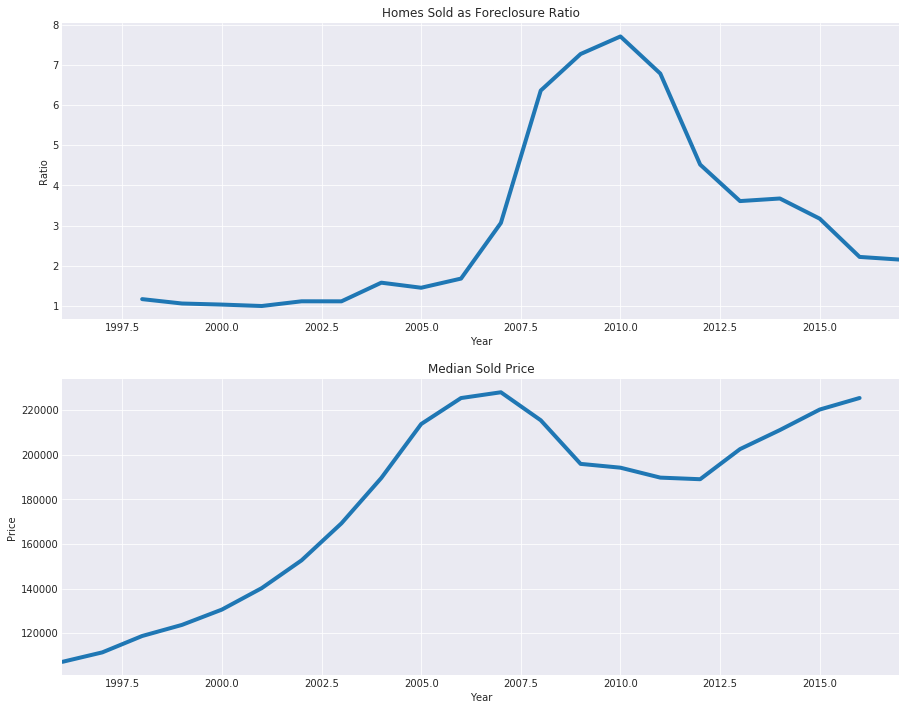

In [11]:
f, ax = plt.subplots(2, 1, figsize=(15, 12))
data.groupby(data['Year'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean().plot(linewidth=4, ax=ax[0])
ax[0].set_title('Homes Sold as Foreclosure Ratio')
ax[0].set_ylabel('Ratio')
data.groupby(data['Year'])['MedianSoldPrice_AllHomes'].mean().plot(linewidth=4, ax=ax[1])
ax[1].set_title('Median Sold Price')
ax[1].set_ylabel('Price')
plt.show()

And as we expected, the ratio of houses sold as foreclosure started climbing drastically around 2006 and peaked in 2010 and started to go down since then. 

### By state

Highest foreclosure ratio of 12.64 in Nevada
Lowest foreclosure ratio of 0.31 in Kentucky


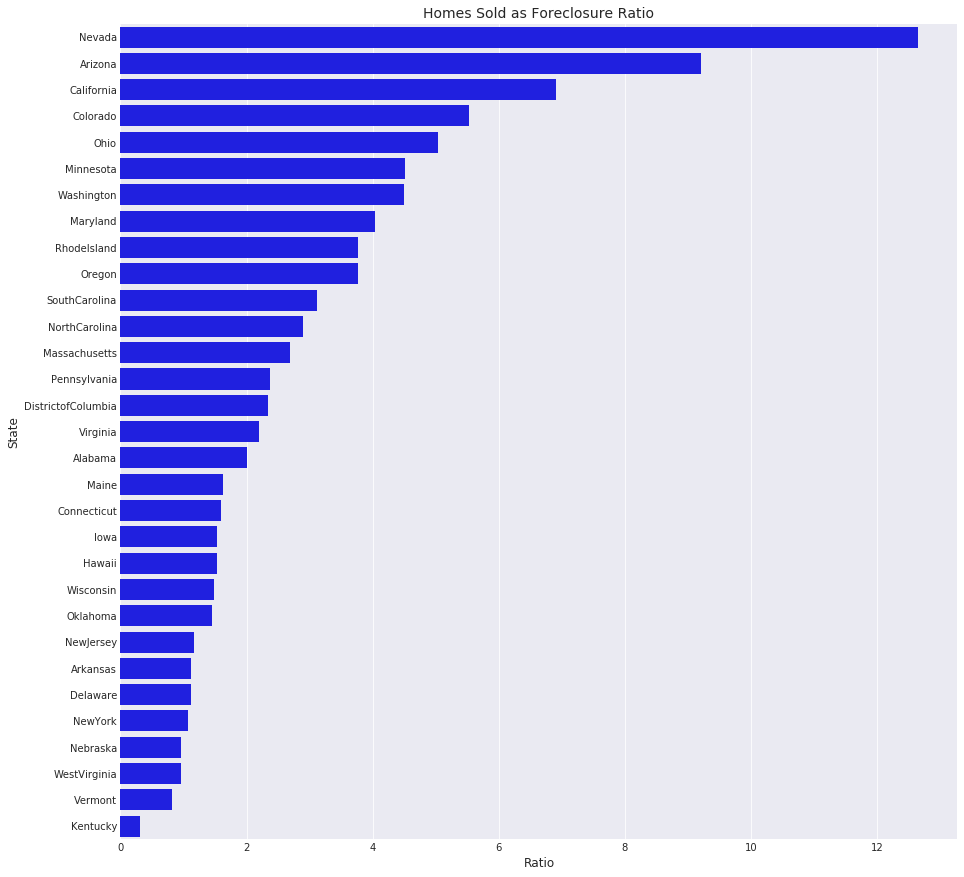

In [12]:
states = data.groupby(data['RegionName'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean().dropna().sort_values(ascending=False).index
values = data.groupby(data['RegionName'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean().dropna().sort_values(ascending=False).values
plt.figure(figsize=(15, 15))
sns.barplot(y=states, x=values, color='blue')
plt.title('Homes Sold as Foreclosure Ratio', fontsize=14)
plt.xlabel('Ratio', fontsize=12)
plt.ylabel('State', fontsize=12)
print('Highest foreclosure ratio of {} in {}'.format(round(values[0], 2), states[0]))
print('Lowest foreclosure ratio of {} in {}'.format(round(values[-1], 2), states[-1]))

## 8. Price increase, decrease, gain and loss

Let's check the percentage of increase, decrease, gain and loss in value of real estate through the years.

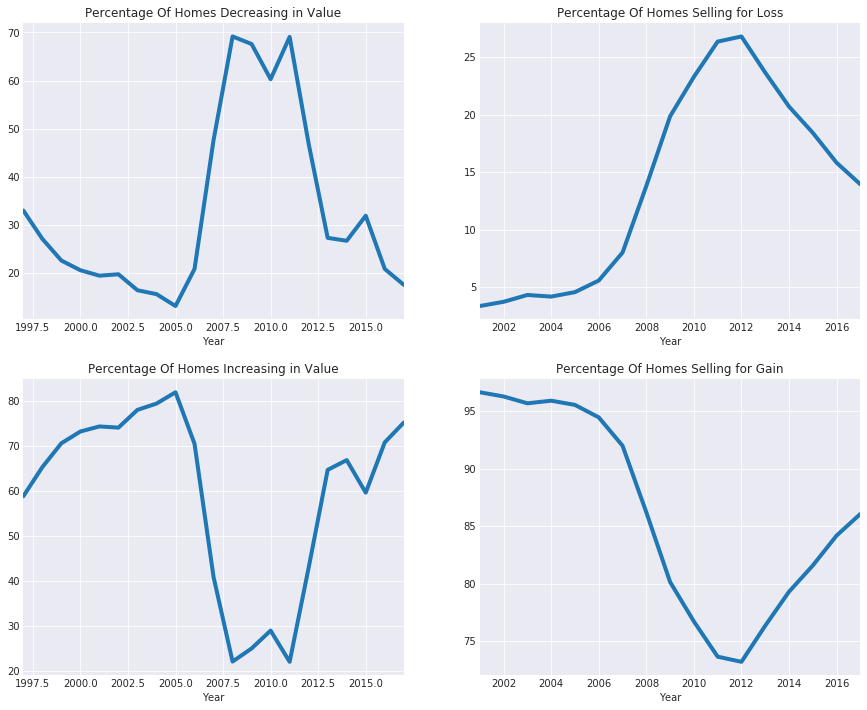

In [13]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))

data.groupby(data['Year'])['PctOfHomesDecreasingInValues_AllHomes'].mean().dropna().plot(linewidth=4, ax=ax[0, 0])
data.groupby(data['Year'])['PctOfHomesIncreasingInValues_AllHomes'].mean().dropna().plot(linewidth=4, ax=ax[1, 0])
data.groupby(data['Year'])['PctOfHomesSellingForGain_AllHomes'].mean().dropna().plot(linewidth=4, ax=ax[1, 1])
data.groupby(data['Year'])['PctOfHomesSellingForLoss_AllHomes'].mean().dropna().plot(linewidth=4, ax=ax[0, 1])
ax[0, 0].set_title('Percentage Of Homes Decreasing in Value')
ax[0, 1].set_title('Percentage Of Homes Selling for Loss')
ax[1, 0].set_title('Percentage Of Homes Increasing in Value')
ax[1, 1].set_title('Percentage Of Homes Selling for Gain')
plt.show()

It seems a little bit obvious, but we can see that before the recession, real estate was increasing in value, during it was losing value and after it started gaining value again. The increase is almost perfectly correlated with the decrease in value. It's interesting to see that the amount of homes selling for loss increased during the recession and the amount selling for gain decreased during it.

## 9. Which estates suffered the most with the crash?

Just as a fun fact, we can check which cities suffered the most from the crash, and which ones recovered the best. First, let's find which years had the highest and lowest median sold prices.

In [14]:
max_price = data.groupby(data['Year'])['MedianSoldPrice_AllHomes'].mean().max()
max_year  = data.groupby(data['Year'])['MedianSoldPrice_AllHomes'].mean().argmax()
min_price = data.groupby(data['Year'])['MedianSoldPrice_AllHomes'].mean().min()
min_year = data.groupby(data['Year'])['MedianSoldPrice_AllHomes'].mean().argmin()
print('Max median price of ${:,.2f} in {}'.format(max_price, max_year))
print('Min median price of ${:,.2f} in {}'.format(min_price, min_year))

Max median price of $228,057.56 in 2007
Min median price of $107,141.40 in 1996


Ok... so, the lowest median price was in 1996. I think it's unlikely that prices will fall back to the same levels that they were two decade ago, mostly because of inflation. Anyway... if we find the lowest price after 2007 (which was the year with the highest prices), we can find which was the worst year for the real estate market after the crash.

In [15]:
min_year_after07  = data.groupby(data['Year'])['MedianSoldPrice_AllHomes'].mean()[11:].argmin()
min_price_after07 = data.groupby(data['Year'])['MedianSoldPrice_AllHomes'].mean()[11:].min()
print('Min median price after \'07 of ${:,.2f} in {}'.format(min_price_after07, min_year_after07))

Min median price after '07 of $189,051.22 in 2012


It looks like the worst year for the real estate market was 2012. Now we let's look at how the prices were looking by estate in those years.

We can make a dataframe with the prices in those years and create a columns with the % variation.

In [16]:
values_07 = data[data['Year'] == 2007].groupby(data['RegionName'])['MedianSoldPrice_AllHomes'].mean().dropna().values
estates   = data[data['Year'] == 2007].groupby(data['RegionName'])['MedianSoldPrice_AllHomes'].mean().dropna().index
values_12 = data[data['Year'] == 2012].groupby(data['RegionName'])['MedianSoldPrice_AllHomes'].mean().dropna().values
df = pd.DataFrame({'2007 Price': values_07, 
                   '2012 Price': values_12}, index=estates)
df['Variation'] = round((df['2012 Price'] - df['2007 Price'])/df['2007 Price'], 2)

RegionName
Nevada       -0.53
Florida      -0.41
California   -0.36
Arizona      -0.35
Illinois     -0.31
Name: Variation, dtype: float64


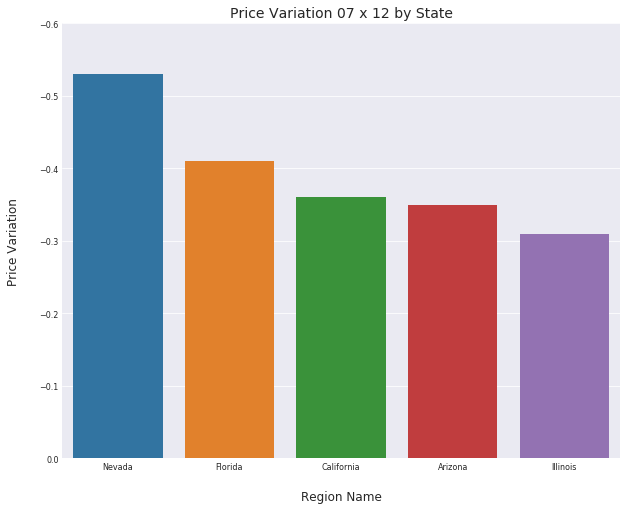

In [17]:
estates = df['Variation'].sort_values(ascending=True).head(5).index
values  = df['Variation'].sort_values(ascending=True).head(5).values
print(df['Variation'].sort_values(ascending=True)[:5])
plt.figure(figsize=(10, 8))
plt.title('Price Variation 07 x 12 by State',fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('Price Variation\n', fontsize=12)
sns.barplot(x=estates, y=values)
plt.xlabel('\nRegion Name', fontsize=12)
plt.ylim(0, -0.6)
plt.show()

So the states that suffered the most with the subprime crisis regarding prices of real estate were Nevada, Florida, California, Arizona and Illinois.

# Conclusion

Median prices in 2006: $225,463.40
Median prices in 2008: $215,503.18
Median prices at 2012: $189,051.22
Median prices in 2016: $225,490.22


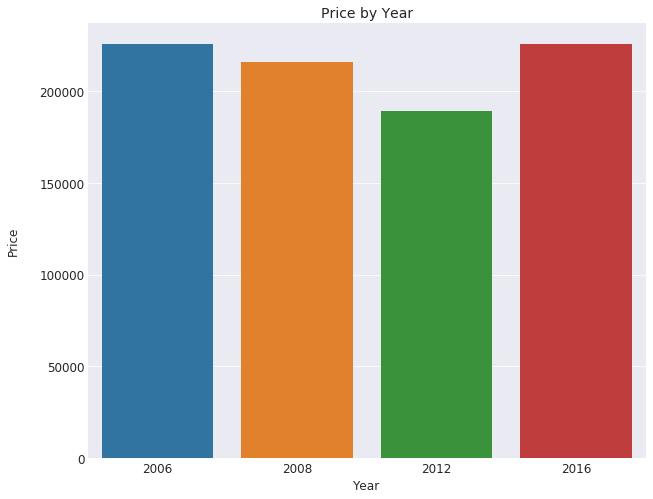

In [18]:
prices = [data[data['Year'] == 2006]['MedianSoldPrice_AllHomes'].mean(),
         data[data['Year'] == 2008]['MedianSoldPrice_AllHomes'].mean(),
         data[data['Year'] == 2012]['MedianSoldPrice_AllHomes'].mean(),
         data[data['Year'] == 2016]['MedianSoldPrice_AllHomes'].mean()]
years = [2006, 2008, 2012, 2016]
print('Median prices in 2006: ${:,.2f}'.format(round(prices[0], 2)))
print('Median prices in 2008: ${:,.2f}'.format(round(prices[1], 2)))
print('Median prices at 2012: ${:,.2f}'.format(round(prices[2], 2)))
print('Median prices in 2016: ${:,.2f}'.format(round(prices[3], 2)))
plt.figure(figsize=(10, 8))
sns.barplot(y=prices, x=years)
plt.title('Price by Year', fontsize=14)
plt.xticks(fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Price\n', fontsize=12)
plt.show()

From our short analysis, we can see that right before the 2008 subprime crisis, the growth in price of real estate started to slow down, from a previous exponential increase, at the same time, percentage os homes selling for a loss started to increase and also the ratio of homes sold as foreclosure. Looking back, we can see that it was possible to identify that something was weird in the real estate market, the thing is, that it's hard to realize before it happens. 

At the moment, we can see that Prices are back at pre 2008 levels, but from the data we can conclude that there is no risk of another crisis in the real estate market, since variables like homes sold as foreclosure, time to sell and homes selling for loss are down.

If you've made it this far in the notebook, thank you for reading! Don't forget to upvote if you liked it or if it helped you in any way.